# Date A Scientist

#### In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

#### In this capstone, I will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

#### The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status (relationship status)

#### And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

#### The goal for this project is to discover how the following variables affect each other using linear regression and machine learning models.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from itertools import combinations
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

#### To understand what the data from OKCupid looks like and how it is structured, I will display the first 10 rows of the dataset.

In [2]:
df = pd.read_csv("profiles.csv")
df.head(10)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,never,graduated from college/university,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,virgo,NaN,english,single
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,sagittarius,no,"english, spanish (okay)",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,NaN,"oh goodness. at the moment i have 4 jobs, so i...",NaN,i'm freakishly blonde and have the same name a...,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity but not too serious about it,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,"san mateo, california",NaN,straight,likes d

#### Here is the unique amount of responses per column. This will help people understand the variety of the data I am working with through this project.

In [3]:
df.nunique()

age               54
body_type         12
diet              18
drinks             6
drugs              3
education         32
essay0         54350
essay1         51516
essay2         48635
essay3         43533
essay4         49260
essay5         48963
essay6         43603
essay7         45554
essay8         39324
essay9         45443
ethnicity        217
height            60
income            13
job               21
last_online    30123
location         199
offspring         15
orientation        3
pets              15
religion          45
sex                2
sign              48
smokes             5
speaks          7647
status             5
dtype: int64

After reviewing the data, an interesting question would be to see if income can be predicted based on education, body type, smoking, drinking and drugs because I have a feeling that lifestyle choices could potentially affect someone's income. There are past records that show that income can be predicted based on education alone, but I am curious to test out other variables that may or may not be related to income. I will test three different methods of determining the best way to predict income. I'll be using a linear regression, k nearest neighbor, and random forest. Each method will be graded on the others based on the option that is best for predicting income. Before proceeding, I will review the data types that each column falls under.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

As shown above, much of the data is not in a numerical format and needs to be mapped to something that a machine learning algorithm can analyze. To start, I list out the unique values to check for mapping that has a scale.

For sex, I will convert to a 1 for male and 0 for female.

For sexual orientation, I will convert to a 0 is straight, 1 is bisexual, and 2 is gay.

For drinking, I will convert 'no' to 0, 'sometimes' to 1, 'when drinking' to 2, 'yes' to 2, and 'trying to quit' to 3. I am combining the 'when drinking' and 'yes' as those responses are similar. There is a fair amount of nan values that I am going to fill with the rounded average of the responses.

For status, I will convert 'single' to 0, 'available' to 1, 'seeing someone' to 2, 'married' to 3, and 'unknown' to 4.

For school, there will be more work to group the levels. To simplify the data, it will be broken down into five groups from didn't finish high school, high school, associates, bachelors, masters, doctors, and space camp. If someone started a program but didn't finish - they will be dropped down the lower level. Those working on a level will be considered the next level down. The following will be the groupings:

##### No high school: 'dropped out of high school', 'working on high school'

##### High school: 'high school', 'dropped out of two-year college', 'graduated from high school', 'dropped out of college/university'

##### Associates: 'working on two-year college', 'two-year college', 'graduated from two-year college', 

##### Bachelors: 'working on college/university', 'graduated from college/university', 'college/university', 'dropped out of masters program' 

##### Masters: 'graduated from masters program', 'working on masters program', 'masters program', 'dropped out of ph.d program', 'dropped out of med school', 'dropped out of law school'

##### Doctors: 'graduated from PH/d program', 'graduated from law school', 'working on ph.d program', 'working on med school', 'graduated from med school', 'working on law school', 'law school', 'ph.d program', 'med school'

##### Space camp: 'working on space camp', 'graduated from space camp', 'dropped out of space camp' 

The other category with a breakdown potential is body type. Body type breaks down as such: 0 : 'thin', 'skinny' 1 : 'athletic', 'fit', 'jacked' 2 : 'a little extra', 'average', Nan, 'rather not say' 3 : 'used up', 'overweight', 'full figured', 'curvy'

For nan and prefer not to say, I will map as average given there is a decent chance they are of average weight. 

In [5]:
features = ['sex', 'age', 'orientation', 'smokes', 'status', 'income', 'education', 'diet', 'height', 'job', 'body_type', 'drinks', 'drugs']

for i in features:
    print(i, ' :\n\n',df[i].unique())

sex  :

 ['m' 'f']
age  :

 [ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
orientation  :

 ['straight' 'bisexual' 'gay']
smokes  :

 ['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
status  :

 ['single' 'available' 'seeing someone' 'married' 'unknown']
income  :

 [     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]
education  :

 ['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out of space camp'
 'graduated from ph.d program' 'graduated from law school'
 'working on ph.d program' 'two-year college'
 'graduated from two-

In [6]:
# creating a new dataframe to reload data. Otherwise, the dataframe gets
# overwritten and makes all the values NaN on rerunning the cell.  
headings = ['sex', 'age', 'orientation', 'smokes', 'status', 'income', 'education', 'height','body_type', 'drinks', 'drugs']
love_map = pd.DataFrame(data=df[headings])
love_map.sex = df.sex.map({'m':0, 'f':1})
love_map.orientation = df.orientation.map({'straight':0, 'bisexual':1, 'gay':2})
love_map.smokes = df.smokes.map({'no':0, 'sometimes':1, 'when drinking':2, 'yes':2, 'trying to quit': 3})
love_map.smokes.fillna(0, inplace = True)
love_map.status = df.status.map({'single':0, 'available':1, 'seeing someone':2, 'married':3, 'unknown': 4})
love_map.status.fillna(0, inplace = True)
love_map.drinks = df.drinks.map({'not at all':0, 'rarely':1, 'socially':2, 'often':3, 'very often':4, 'desperately':5})
love_map.drinks.fillna(0, inplace = True)
love_map.drugs = df.drugs.map({'never':0, 'sometimes':1, 'often':2})
love_map.drugs.fillna(0, inplace = True)

#The reason for the run ons is each mapping level is on the same line making checking values easier. 

love_map.education = df.education.map({'dropped out of high school': 0, 'working on high school': 0, 
                                             'high school': 1, 'dropped out of two-year college':1, 'graduated from high school':1, 'dropped out of college/university':1,
                                             'working on two-year college':2, 'two-year college':2, 'graduated from two-year college':2,
                                             'working on college/university':3, 'graduated from college/university':3, 'college/university':3, 'dropped out of masters program':3,
                                             'graduated from masters program': 4, 'working on masters program':4 , 'masters program' :4, 'dropped out of ph.d program':4, 'dropped out of med school':4, 'dropped out of law school':4,
                                             'graduated from PH/d program': 5, 'graduated from law school':5, 'working on ph.d program':5, 'working on med school':5, 'graduated from med school':5, 'working on law school':5, 'law school':5, 'ph.d program':5, 'med school':5,
                                             'working on space camp':6, 'graduated from space camp':6, 'dropped out of space camp':6
                                            })
love_map.education.fillna(2, inplace = True)
love_map.body_type = df.body_type.map({'thin':0, 'skinny':0,
                                   'athletic': 1, 'fit' : 1, 'jacked' : 1, 
                                   'a little extra': 2, 'average': 2, 'rather not say': 2,
                                   'used up' : 3, 'overweight' : 3, 'full figured' : 3, 'curvy' : 3
                                  })
love_map.body_type.fillna(2, inplace = True)
love_map.height = df.height.apply(lambda x: love_map.height.mean() 
                                        if x <= 10
                                        else x)
love_map.height.fillna(love_map.height.mean(), inplace = True)
love_map.reset_index()
love_map['income'] = df['income']
love_map.income.dropna(inplace = True)
love_map = love_map[love_map.income != -1]
love_map.reset_index()
love_small = love_map[headings]
#Verify the mapping has been properly applied.
print(love_map[headings].head())
print(love_small[~love_small.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64))
for i in headings:
    print(i, ' :', np.isnan(love_map[i]).values.sum())

scaler = RobustScaler().fit(love_map)
love_map = pd.DataFrame(scaler.transform(love_map), columns = headings)

print(love_map.head(20))

    sex  age  orientation  smokes  status  income  education  height  \
1     0   35            0     0.0       0   80000        6.0    70.0   
3     0   23            0     0.0       0   20000        3.0    71.0   
11    0   28            0     0.0       2   40000        3.0    72.0   
13    1   30            0     0.0       0   30000        1.0    66.0   
14    1   29            0     0.0       0   50000        3.0    62.0   

    body_type  drinks  drugs  
1         2.0     3.0    1.0  
3         0.0     2.0    0.0  
11        2.0     2.0    0.0  
13        0.0     2.0    0.0  
14        0.0     2.0    0.0  
       sex   age  orientation  smokes  status    income  education  height  \
1      0.0  35.0          0.0     0.0     0.0   80000.0        6.0    70.0   
3      0.0  23.0          0.0     0.0     0.0   20000.0        3.0    71.0   
11     0.0  28.0          0.0     0.0     2.0   40000.0        3.0    72.0   
13     1.0  30.0          0.0     0.0     0.0   30000.0        1.0   

Before continuing, I'll print out histograms of the different headings to see if there are any major biases in the data. Now that the data has been mapped, the data can be broken down into test and training groups.

C:\Users\mason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


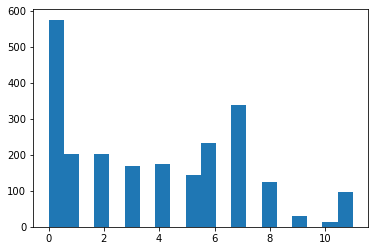

In [7]:
inputs = ['sex', 'orientation', 'age','smokes', 'status', 'education', 'height', 'body_type', 'drinks', 'drugs']
label  = ['income']
x = love_map[inputs]
y = love_map[label]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, test_size = .2)
#print(y_test.head(20))

lab_enc = LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)


plt.hist(y_test, bins = 20)
plt.show()

 ## Comparing the different types of machine learning - Part 1
 
 The three types of machine learning that will be tested is linear regression, k nearest neighbor, and random forest.

The analysis will proceed in two parts. The first part will be choosing a baseline score for each type of modeling. The baseline will be fairly arbitrary, but each method will produce a score.

The second phase is to improve the score for each method used. Several methods for improving the score will be used. One will be pruning the data to see if having less data improves the score for each of the methods. From there I'll change the number of k neighbors for the KNN model. For the random forest, I'll attempt to find an optimal number of estimators and random states.

To grade the best model, the score of the test data will be used to find the best way to predict income. I'll also analyze which features have the highest impact on income.

Lets start with linear regression.

### Linear Regression - Part 1

The goal with using multi-dimensional linear regression is to see if we can create a fit that will predict income.

In [8]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [9]:
y_predict = regression.predict(x_test)
print(regression.coef_)
print(regression.score(x_test, y_test))

[-0.82411782 -0.48523637  1.06532203 -0.32791318 -0.12449018  0.48986927
  0.252579   -0.28953414  0.43971724 -0.46948442]
0.1726930762069543


Not a great start linear regression. A score of less than one is pretty bad. In phase two, we can see if pruning will get that score up. Based on the coefficient values, there are some good candidates for droppring from the dataset.

### K Neighbor Regressor - Part 1

Next we will test out a k nearest neighbor regression model. We take the same test data as the linear regression model, and plug it into the k neighbor regression model.
The score has the same R squared value of measuring the fit as the linear regression.

In [10]:
k_mean = KNeighborsRegressor(n_neighbors=3, weights = 'distance')
k_mean.fit(x_train, y_train)
k_mean.score(x_test, y_test)

-0.0776466285974946

This model is currently performing worse than the linear regression model by going negative. I'll explore the negative correlation further when this is reviewed over a range of neighbors.

### Random Forest - Part 1

Finally, I am going to test the predictve power of Random Forest with the same data sets as the parts above. I've arbitrarialy choosen 2000 estimators for this system and a random state of zero. I'll explore more estimators and random states in part 2. The math and calculations will get intense!

In [11]:
classifier = RandomForestClassifier(n_estimators = 2000, random_state = 0)
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.25945241199478486

Of the three, this one has the highest predictive power. This is encouraging that one of the methods is strongly predicting the outcome. However, all three methods can use further refinement.

## Comparing the different types of machine learning - part 2

To recap, the model I am attempting to build will best predict the income of a person based on the other self reported features. As with all self reported features, there is a level of scepticism that is needed because all self reported data is subject to bias. Maybe the individual is more fit, or wealthy, or is not being very truthful in terms of their responses on the multiple choice data.

For part two, it is about to come off the chain. I'm going to test several elements. First, I am going to build arrays of different permutations of the features used to identified income. Will removing some columns result in better predictive scores?

For k nearest neighbor and random forest, there are several other variables to test.

For k nearest neighbor, the number of neighbors and the type of weights can be changed in addtion to the number of features used. Furthermore, k nearest neighbor can weight be uniform or distance. In theory distance should perform better because it weights as an inverse square of the distance from the centroid to the point. But, for this problem, uniform may perform better.

There are other parameters in the k means regressor that could be changed as further work.

Finally, the random forest. The first I will play with is the number of estimators. I am going to tray a wide range of estimators to see the sweet spot for the number of estimations. Also, the random state will go over a range to see how that impacts each output.

To simplify the analysis of each option, there will be graphing of the score to make it easier to find the optimal option. I could use a function to find the maximum score and the parameters... but that isn't as pretty to look at.

### Linear Regression - Part 2

This will be the easiest version to model. The only thing that will be changed is the number of features (columns) included in the linear regression model.

The easiest way to test all possible pruning options, a simple combination without replacement can be used. Looking at the scores from the first run, it is apparent the main factors. But, where is the fun in testing a few options when I can run everything through the linear regression model?

In [12]:
col_combinations = []
#needs to start at 1, otherwise an empty list will be created and cause a processing error
for n in range(1,len(inputs)): 
    col_combinations += combinations(inputs, n)

#Uncomment to view the different combinations
#print('\n',list(col_combinations)) 

If you choose to view the different combinations by uncommenting the print statement, you willl see that there are many. From here, the different combinations can be computed, fitted, and a score can be generated. I'll take each of the scores, and place it into another list. Having the list, I'll graph the scores, and see which combination produces the best result.

The one downside I anticipate with this method is it will be computationally intensive. There is a lot of combinations for this single computer to crunch through. But, I think the final result will be much more satisfying.

In [13]:
linear_score_list = []
linear_coef_list = []
for i in col_combinations:    
    inputs = list(i) #convert the values to a list
    label  = ['income']
    #print(love_map[inputs])
    x = love_map[inputs] # plug the new heading into data frame for creating a new dataframe to train/test/split
    y = love_map[label]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, test_size = .2)
    regression.fit(x_train, y_train) # fit for new training data
    linear_score_list.append(regression.score(x_test, y_test)) #save count and regression score
    linear_coef_list.append(list(regression.coef_[0])) #save the coefficients for that run
    
#print(linear_coef_list)

Now that all of the different combinations have been tested, those values and coefficients can be plotted to find the best fit. The closer to 1 the score (r squared value) the better in the graph. Also, The best score and the place in the array is printed out. Let's see the best score...

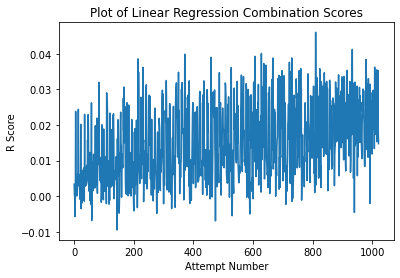

Maximum value: 0.046062777487156814 At index: 810


<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(linear_score_list)
plt.title('Plot of Linear Regression Combination Scores')
plt.ylabel('R Score')
plt.xlabel('Attempt Number')
plt.show()
plt.clf()

max_value = max(linear_score_list)
max_loc = linear_score_list.index(max_value)
print('Maximum value:', max_value, "At index:", max_loc)

      orientation       age  smokes  status  education  height  body_type  \
4702          0.0 -0.583333     0.0     0.0        0.0     0.4        0.0   
3670          0.0 -0.666667     0.0     0.0       -1.0     1.0        1.0   
6806          0.0  0.833333     0.0     0.0        1.0    -1.2        0.0   
9797          0.0 -0.416667     0.0     0.0        0.0     1.2        1.0   
5698          1.0  0.750000     3.0     1.0       -2.0     0.8        1.0   

      drinks  drugs  
4702    -1.0    0.0  
3670    -2.0    0.0  
6806    -1.0    0.0  
9797     0.0    1.0  
5698     0.0    1.0  
3.0444332855633767


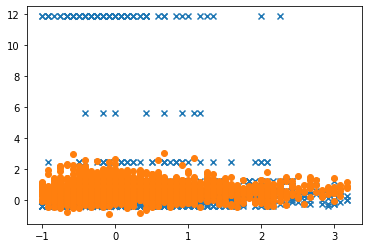

<Figure size 432x288 with 0 Axes>

In [15]:
print(x_test.head())
Linear_prediction = regression.predict(x_test)
print(Linear_prediction.max())
plt.scatter(x_test.age, y_test, marker = 'x')
plt.scatter(x_test.age, Linear_prediction, marker = 'o')
plt.show()
plt.clf()

In [16]:
y_test.head(10)

,income
4702,0.250
3670,-0.250
6806,0.625
9797,-0.125
5698,0.625
2475,-0.125
8171,0.625
1939,-0.375
33,-0.375
2630,-0.375


In [17]:
layout_df = pd.DataFrame(col_combinations[max_loc], columns = ['headings']) # pass the location of the max score and store headings
layout_df['coefficients'] = pd.DataFrame(linear_coef_list[max_loc]) # pass the location of the max score and store coefficients

layout_df[['headings', 'coefficients']]

,headings,coefficients
0,orientation,-0.044328
1,smokes,-0.030509
2,education,0.256089
3,height,0.194935
4,drinks,0.170664
5,drugs,0.284717


Drug use clearly has the highest bearing on a person's income, even more than education, which was a close second. It seems as though drinking also affects income. However, with the low score (R squared) value, linear regression doesn't seem to be a great fit for predicting income.

### K Nearest Neighbor - Part 2

So in the base case 3 neighbors were used. For part 2, the number of neighbors will be tried from 1 to 100. If it doesn't look like there is convergance about a point, a higher value will be choosen.

After making sure that chunk of code works, There is going to be another round of testing with changing the number of columns used in the test data. There will be a test of changing the columns and sweeping through the different neighbors.

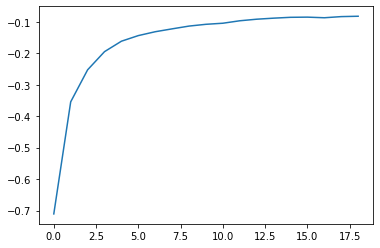

<Figure size 432x288 with 0 Axes>

In [18]:
k_score = []
for i in range(1,20):
    k_mean = KNeighborsRegressor(n_neighbors=i, weights = 'distance')
    k_mean.fit(x_train, y_train)
    k_score.append(k_mean.score(x_test, y_test))
    
plt.plot(k_score)
plt.show()
plt.clf()

After seeing the 'knee' in the score occur at values of less than 10, the range of neighbors will drop to 10 for each k nearest neighbor test. Otherwise, the number of computations for each combination will get excessive slowing down the program.

What is worrying is even with a test case there is a negative r squared score. Maybe with higher values of k the r score will improve?

Below I have added tests for changing the number of columns used in the analysis along with varying k values. This data run will take awhile, but it will give a great range of changing the input columns and the number neighbors in the same calculation.

In [22]:
counter = 0
k_score_df = pd.DataFrame(range(1,11))
k_mean_lists = []

for i in col_combinations:    
    inputs = list(i) #convert the values to a list
    label  = ['income']
    #print(inputs)
    x = love_map[inputs] # plug the new heading into data frame for creating a new dataframe to train/test/split
    y = love_map[label]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, test_size = .2)
    for j in range(1,11):
        k_mean = KNeighborsRegressor(n_neighbors=j, weights = 'distance')
        k_mean.fit(x_train, y_train)
        k_mean_lists.append(k_mean.score(x_test, y_test))
    k_score_df[counter] = pd.DataFrame(k_mean_lists)
    k_mean_lists.clear()
    #print(k_score_df)
    counter += 1
    

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  k_score_df[counter] = pd.DataFrame(k_mean_lists)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/2304170866.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

Now all of the data has been loaded into a dataframe. What I want to find is the combination that returns the highest score (R squared) value of the model. The code above will result in a performance warning, but still works.

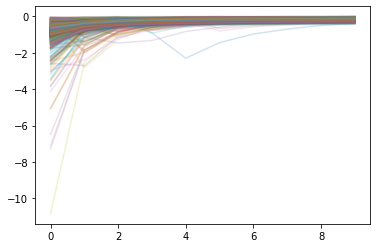

0      -0.012000
1      -0.029593
2      -0.064024
3      -0.069190
4      -0.007572
          ...   
1017   -0.139814
1018   -0.108468
1019   -0.183860
1020   -0.165412
1021   -0.205798
Length: 1022, dtype: float64


<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(k_score_df, alpha = .2)
plt.show()
plt.clf()

print(k_score_df.max())

What is quite peculiar is the score has an asymptote at zero. No matter the combination, the R square score never exceeds zero. Perhaps the application of this formula isn't correct.

Well, it didn't get any better with changing the number of inputs or the number of columns. All of the options maintain a negative score, and have no positive predictive capabilities. Unfortunately, this method is a bust for predicting income.

### Random Forest - Part 2

The final method to improve is random forest. Of the three methods attempted in part 1, Random Forest had the best predictive capabilities. With the next round of Random Forest, like in the other attempts to improve accuracy, pruning of the trees will happen by reducing and mixing the columns fed into the formula.

Like with the k nearest neighbors approach, the number of estimators will also change to see if changing the estimators with changing the number of trees improves the score.

To start, lets input a range of estimators to see if the score improves about a certain number of estimators

In [24]:
forest_array = []
forest_predict = []
for i in range(100,4000, 500):
    classifier = RandomForestRegressor(n_estimators = i, random_state = 0)
    classifier.fit(x_train, y_train)
    forest_array.append(classifier.score(x_test.values, np.ravel(y_test)))
    forest_predict.append(classifier.predict(x_test.values))

C:\Users\mason\AppData\Local\Temp/ipykernel_5904/471550278.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/471550278.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/471550278.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)
C:\Users\mason\AppData\Local\Temp/ipykernel_5904/471550278.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fi

While the output is producing a warning, the program is still processing the information. To analyze the output, let's print out a graph of the scores.

2301


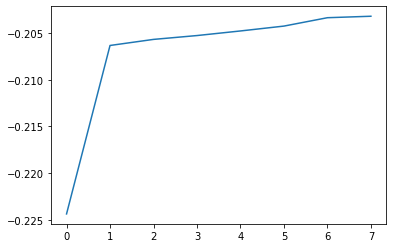

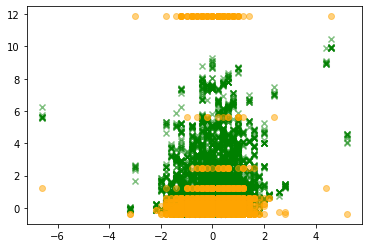

<Figure size 432x288 with 0 Axes>

In [25]:
#print(forest_array)
print(len(forest_predict[2]))
plt.plot(forest_array)
plt.show()
plt.clf()

for i in forest_predict:
    plt.scatter(x_test.height, [i], color = 'green', marker = 'x', alpha = .5)

plt.scatter(x_test.height, y_test, color = 'orange', marker = 'o', alpha = .5)
plt.show()
plt.clf()

For the first reviewed option, the prediction score never goes above zero. This means there is a slight negative correlation. The lower number of forests is a better negative predictor than adding more forests.

To further analyze the options, I'll now do a full sweep of the different combinations of columns to see if there is an optimal combination of data to give the best predictive values. With each combination, the number of forests is changed to find the optimal "knee" of each combination.

In [ ]:
forest_array = []
forest_predict = []

for i in col_combinations:    
    inputs = list(i) #convert the values to a list
    label  = ['income']
    #print(inputs)
    x = love_map[inputs] # plug the new heading into data frame for creating a new dataframe to train/test/split
    y = love_map[label]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8, test_size = .2)

    for i in range(100,4000, 500):
        classifier = RandomForestRegressor(n_estimators = i, random_state = 0)
        classifier.fit(x_train, np.ravel(y_train))
        forest_array.append(classifier.score(x_test.values, np.ravel(y_test)))
        forest_predict.append(classifier.predict(x_test.values))
        #print(classifier.score(x_test.values, np.ravel(y_test)))

In [ ]:
counter = 1
score_array = []
predict_array = []
forest_score_df = pd.DataFrame()
forest_predict_df = pd.DataFrame()
for i in range(1,2032):
    if i%8 ==0:
        forest_score_df[counter] = score_array
        forest_predict_df[counter] = predict_array
        counter +=1
        score_array = []
        predict_array = []
    else:
        score_array.append(forest_array[i])
        predict_array.append(forest_predict[i])
        
    #print(forest_array[i])
print(forest_score_df.head(8))

for i in range(1,len(forest_df)):
    plt.plot(forest_df[i])
plt.show()
plt.clf()

for i in range(1, len(forest_df)):
    plt.plot(predict_array)
plt.show()
plt.clf()

With the first graph, there still isn't much in the way of improvement of the score even when sweeping through different combinations of data and changing the number of forests. One cause of this is my number of forests is too high and I am not seeing the bend like what is shown in the k nearest neighbors graphs.

What can be confidently said about the predictive value of this approach is there is not a relationship.

When looking at the predicted values from the forest, the values stay close to zero. Which means there is not much predictive value of forest. This approach still struggles with the outliers in terms of income.

## Conclusion

So, in doing this analsysis most of the predictive models don't produce a strong fit. The scores are all low for making a definitive statement about the connection of other attributes to income. Random Forest - Part 1 was the algorithm that produced the highest score, but it was still below 0. Linear regression part 2 did show that drug use had more of an effect on a person's income than education, but not by a significant amount.